# Anotações - Prova 1

```r
#-----------------------------------------------------------------------
#                                            Prof. Dr. Walmes M. Zeviani
#                                leg.ufpr.br/~walmes · github.com/walmes
#                                        walmes@ufpr.br · @walmeszeviani
#                      Laboratory of Statistics and Geoinformation (LEG)
#                Department of Statistics · Federal University of Paraná
#                                       2021-out-21 · Curitiba/PR/Brazil
#-----------------------------------------------------------------------

#-----------------------------------------------------------------------

sache <- factor(rep(c("A", "B", "C"), each = 4))
y <- c(18, 23, 21, 17,
       17, 21, 20, 19,
       23, 21, 25, 24)

plot(y ~ as.integer(sache))

X <- matrix(c(1, 0, 0,
              1, 0, 0,
              1, 0, 0,
              1, 0, 0,
              0, 1, 0,
              0, 1, 0,
              0, 1, 0,
              0, 1, 0,
              0, 0, 1,
              0, 0, 1,
              0, 0, 1,
              0, 0, 1), ncol = 3, byrow = TRUE)
X

Y <- cbind(y)
Y

solve(t(X) %*% X)
t(X) %*% Y

solve(t(X) %*% X) %*% t(X) %*% Y


tapply(y, sache, mean)

m0 <- lm(y ~ 0 + sache)
coef(m0)

m0 <- lm(y ~ sache)
coef(m0)

X <- matrix(c(1, 0, 0,
              1, 0, 0,
              1, 0, 0,
              1, 0, 0,
              1, 1, 0,
              1, 1, 0,
              1, 1, 0,
              1, 1, 0,
              1, 0, 1,
              1, 0, 1,
              1, 0, 1,
              1, 0, 1), ncol = 3, byrow = TRUE)
X

solve(t(X) %*% X) %*% t(X) %*% Y

anova(m0)

#-----------------------------------------------------------------------

# \mu + e_{ij}
X0 <- model.matrix(~1, data = data.frame(sache = sache))
X0

# \mu_i + e_{ij} ou \mu + \tau_i + e_{ij}
X1 <- model.matrix(~0 + sache, data = data.frame(sache = sache))
X1

I <- diag(length(y))
I %*% I # Indepotente: é simétrica e ela vezes ela é ela.

H0 <- X0 %*% solve(t(X0) %*% X0) %*% t(X0)
MASS::fractions(H0)

H1 <- X1 %*% solve(t(X1) %*% X1) %*% t(X1)
MASS::fractions(H1)

# Fator de correção C = sum y_{..}^2/n
sum(y)^2/length(y)
t(Y) %*% H0 %*% Y

# sum y_{i.}^2/r    - C
(t(Y) %*% H1 %*% Y) - (t(Y) %*% H0 %*% Y)

t(Y) %*% H0 %*% Y
t(Y) %*% H1 %*% Y

t(Y) %*% (I - H1) %*% Y
t(Y) %*% (I - H0) %*% Y

t(Y) %*% (H1 - H0) %*% Y
(t(Y) %*% H1 %*% Y) - (t(Y) %*% H0 %*% Y)

t(Y) %*% (H1 - H0) %*% Y # SQtratamento
t(Y) %*% (I - H1) %*% Y  # SQresiduo

traco <- function(A) sum(diag(A))
traco(H1 - H0)
traco(I - H1)

anova(lm(y ~ sache))

SQTotal <- sum((y - mean(y))^2)

t(Y) %*% Y

pf(4.2484, df1 = 2, df2 = 9, lower.tail = FALSE)

#-----------------------------------------------------------------------
```

Implementação em python

In [11]:
# Imports
from IPython.display import display, Latex
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import utils

from statsmodels.formula.api import ols

Definindo os tratamentos, repetições e arbitrando resultados das observações, temos:

,0,1,2,3,4,5,6,7,8,9,10,11
y,18,23,21,17,17,21,20,19,23,21,25,24
tratamentos,A,A,A,A,B,B,B,B,C,C,C,C


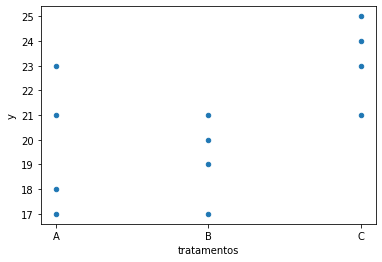

In [24]:
tratamentos = ["A", "B", "C"]
numero_de_repeticoes = 4
observado = [18, 23, 21, 17, 17, 21, 20, 19, 23, 21, 25, 24]

observacoes_dataframe = pd.DataFrame({'y': observado, 'tratamentos': np.repeat(tratamentos, numero_de_repeticoes)})
display(observacoes_dataframe.T)
observacoes_dataframe.plot.scatter('tratamentos', 'y');

Na forma matricial, temos um vetor de observações Y:

In [21]:
Y = np.vstack(observacoes_dataframe['y'])
Latex(utils.array_to_latex(Y, 'Y ='))

<IPython.core.display.Latex object>

Partimos de 2 hipóteses:

$$
    H_0: \mu_A = \mu_B = \mu_C \\
    H_1: \mu_i \neq \mu_j \quad para \quad i \neq j
$$

Destas hipóteses, formulamos um modelo para cada hipótese:

Para H0 assumimos que existe apenas uma média $\mu$ e assim temos a matriz X0 como matriz de delineamento para H0.

In [14]:
X0 = np.vstack(np.ones(len(Y), dtype=int))
Latex(utils.array_to_latex(X0, 'X0 ='))

<IPython.core.display.Latex object>

Para a hipótese H1 assumimos que as médias $\mu_i$ são diferentes para cada um dos 3 tratamentos, para este modelo temos a matriz de delineamento X1.

In [15]:
X1 = np.repeat(np.matrix('1 0 0; 0 1 0; 0 0 1'), repeats=numero_de_repeticoes, axis=0)
Latex(utils.array_to_latex(X1, 'X1 ='))

<IPython.core.display.Latex object>

Dados X0 e X1, podemos encontrar as matrizes de projeção H0 e H1

In [16]:
H0 = X0.dot(np.linalg.inv(X0.T.dot(X0))).dot(X0.T)
display(Latex(utils.array_to_latex(H0, r'H0 =')))

H1 = X1.dot(np.linalg.inv(X1.T.dot(X1))).dot(X1.T)
display(Latex(utils.array_to_latex(H1, r'H1 =')))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Com as matrizes de projeção para H0 e H1, podemos contruir o quadro ANOVA

In [17]:
I = np.identity(len(Y))

graus_de_liberadade_tratamentos = (H1 - H0).trace().item()
display(f'GL Tratamentos: {graus_de_liberadade_tratamentos:.0f}')
graus_de_liberadade_residuos = (I - H1).trace().item()
display(f'GL Resíduos: {graus_de_liberadade_residuos:.0f}')

soma_quadrados_tratamentos = Y.T.dot((H1 - H0)).dot(Y).item()
display(f'SQ Tratamentos: {soma_quadrados_tratamentos:.2f}')
soma_quadrados_residuos = Y.T.dot((I - H1)).dot(Y).item()
display(f'SQ Resíduos: {soma_quadrados_residuos:.2f}')

media_soma_quadrados_tratamento = soma_quadrados_tratamentos / graus_de_liberadade_tratamentos
display(f'Média SQ Tratamentos: {media_soma_quadrados_tratamento:.2f}')
media_soma_quadrados_residuos = soma_quadrados_residuos / graus_de_liberadade_residuos
display(f'Média SQ Resíduos: {media_soma_quadrados_residuos:.2f}')

estatistica_de_teste = media_soma_quadrados_tratamento / media_soma_quadrados_residuos
display(f'Estatística de Teste: {estatistica_de_teste:.3f}')

p_valor = 1 - stats.f.cdf(estatistica_de_teste, graus_de_liberadade_tratamentos, graus_de_liberadade_residuos)
display(f'P-Valor: {p_valor:.3f}')

'GL Tratamentos: 2'

'GL Resíduos: 9'

'SQ Tratamentos: 38.00'

'SQ Resíduos: 40.25'

'Média SQ Tratamentos: 19.00'

'Média SQ Resíduos: 4.47'

'Estatística de Teste: 4.248'

'P-Valor: 0.050'

Comparando os resultados com ANOVA:

In [18]:
fit = ols('y ~ C(tratamentos)', data=observacoes_dataframe).fit()
anova = sm.stats.anova_lm(fit)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamentos),2.0,38.00,19.000000,4.248447,0.050207
Residual,9.0,40.25,4.472222,NaN,NaN
